In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import sqlite3

## Reading Data

In [2]:
os.chdir(r'../Data')

In [3]:
conn=sqlite3.connect('./database.sqlite')

In [4]:
pd.read_sql_query('select * from reviews',conn).head()

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017


In [5]:
pd.read_sql_query('select * from genres',conn).head()

,reviewid,genre
0,22703,electronic
1,22721,metal
2,22659,rock
3,22661,rock
4,22725,electronic


In [6]:
pd.read_sql_query('select * from labels',conn).head()

,reviewid,label
0,22703,virgin
1,22721,hathenter
2,22659,static shock
3,22659,fashionable idiots
4,22661,kill rock stars


In [7]:
df=pd.read_sql_query("select r.*,g.genre,l.label from reviews r left join genres g on r.reviewid=g.reviewid left join labels l on r.reviewid=l.reviewid",conn)

Combining reviews,genre and labels table

## Final Data

In [8]:
df.drop(['reviewid','title','url','pub_date'],axis=1,inplace=True)
df.head()

,artist,score,best_new_music,author,author_type,pub_weekday,pub_day,pub_month,pub_year,genre,label
0,massive attack,9.3,0,nate patrin,contributor,6,8,1,2017,electronic,virgin
1,krallice,7.9,0,zoe camp,contributor,5,7,1,2017,metal,hathenter
2,uranium club,7.3,0,david glickman,contributor,5,7,1,2017,rock,fashionable idiots
3,uranium club,7.3,0,david glickman,contributor,5,7,1,2017,rock,static shock
4,"kleenex, liliput",9.0,1,jenn pelly,associate reviews editor,4,6,1,2017,rock,kill rock stars


Here we will try to predict the score of music albums.

In [9]:
df.to_csv('Pitchfork.csv') 

In [10]:
df.shape

(24909, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24909 entries, 0 to 24908
Data columns (total 11 columns):
artist            24909 non-null object
score             24909 non-null float64
best_new_music    24909 non-null int64
author            24909 non-null object
author_type       19487 non-null object
pub_weekday       24909 non-null int64
pub_day           24909 non-null int64
pub_month         24909 non-null int64
pub_year          24909 non-null int64
genre             22356 non-null object
label             24869 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 2.1+ MB


## Missing Values

In [12]:
(df.isnull().sum()/df.shape[0])*100

artist             0.000000
score              0.000000
best_new_music     0.000000
author             0.000000
author_type       21.767233
pub_weekday        0.000000
pub_day            0.000000
pub_month          0.000000
pub_year           0.000000
genre             10.249307
label              0.160585
dtype: float64

In [13]:
pd.crosstab(df['author'],df['author_type'])

author_type,assistant editor,associate editor,associate features editor,associate reviews editor,associate staff writer,contributing editor,contributor,deputy news editor,editor-in-chief,executive editor,managing editor,news director,senior editor,senior staff writer,tracks coordinator
author,,,,,,,,,,,,,,,
aaron leitko,0,1,0,0,0,0,128,0,0,0,0,0,0,0,0
abby garnett,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0
abigail covington,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
abigail garnett,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0
adam moerder,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vish khanna,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
william bowers,0,0,0,0,0,0,159,0,0,0,0,0,0,0,0
winston cook-wilson,0,0,0,0,0,0,54,0,0,0,0,0,0,0,0


In [14]:
df['author_type']=df['author_type'].fillna(df['author_type'].mode()[0])

In [15]:
df.dropna(inplace=True)

In [16]:
print('Size of dataframe after dropping null values:',df.shape)

Size of dataframe after dropping null values: (22317, 11)


## Exploratory Data Analysis

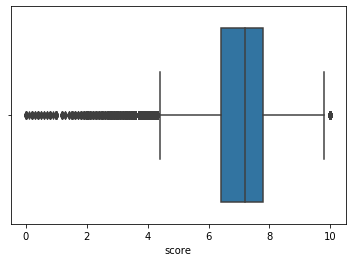

In [17]:
sns.boxplot(df['score'])

The score is highly right skewed. The mean score is around 7. There are albums which got very low scores and very high scores

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22317 entries, 0 to 24907
Data columns (total 11 columns):
artist            22317 non-null object
score             22317 non-null float64
best_new_music    22317 non-null int64
author            22317 non-null object
author_type       22317 non-null object
pub_weekday       22317 non-null int64
pub_day           22317 non-null int64
pub_month         22317 non-null int64
pub_year          22317 non-null int64
genre             22317 non-null object
label             22317 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 2.0+ MB


## EDA Observations

1. Rock music videos are very high in number
2. Author Type is mainly contributer, other values are less
3. Since rock music videos are highest in number, best music videos are higher in rock genre
4. But average score of each genre is not much different. So we need to find the significance of that variable
5. When coming to author type, ass.reviews editor is having higher reviews compared to other types
6. There are artists who got a score 10 and score 0.1
7. In authors also, 2 authors (nelson george & maura johnson) got 10 score
8. Even though the authors got 10 score, their albums are not selected as best music
9. Day,Month and Year is not having any influence in score
10. But in weekday score analysis, weekday 5(friday) published videos are having more score
11. Avg score of best music albums is 8.5 and other one is 7
12. Even though friday has more ratings compared to others, the artists who got 10 didn't release the their albums on friday
13. The artists who got less than 3 score are releasing albums in week days
14. Pop and Global Genre albums released on friday are having higher score

In [12]:
df['best_new_music'].value_counts()

0    23559
1     1350
Name: best_new_music, dtype: int64